In [1]:
import os

import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torch.utils import data as Data
from torchvision import transforms, datasets
%matplotlib inline
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

ModuleNotFoundError: No module named 'torch.nn'

In [2]:
trans = transforms.ToTensor()
mnist_train = datasets.FashionMNIST(root='dataset/Fashion_Minist', train=True, transform=trans, download=True)
mnist_test = datasets.FashionMNIST(root='dataset/Fashion_Minist', train=False, transform=trans, download=True)
NUM_INPUT = 784
NUM_OUTPUT = 10
NUM_HIDDENS = 512
BATCH_SIZE = 256
train_iter = Data.DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_iter = Data.DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)


class Flattenlayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return x.view(x.shape[0], -1)

In [3]:
net = nn.Sequential(Flattenlayer(), nn.Linear(NUM_INPUT, NUM_HIDDENS), nn.ReLU(), nn.Linear(NUM_HIDDENS, NUM_OUTPUT))
loss = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
for params in net.parameters():
    nn.init.normal_(params, mean=0, std=0.01)
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
NUM_EPOCHS = 10
loss_history = []
net.to(device)

Sequential(
  (0): Flattenlayer()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=10, bias=True)
)

In [4]:
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    for batch_imgs, y in train_iter:
        batch_imgs = batch_imgs.to(device)
        y = y.to(device)
        y_hat = net(batch_imgs)
        step_loss = loss(y_hat, y)
        epoch_loss += step_loss

        optimizer.zero_grad()
        step_loss.backward()
        optimizer.step()
    loss_history.append(epoch_loss)
    print(f'{epoch=};{epoch_loss=}')

epoch=0;epoch_loss=tensor(183.5272, device='cuda:0', grad_fn=<AddBackward0>)
epoch=1;epoch_loss=tensor(113.1409, device='cuda:0', grad_fn=<AddBackward0>)
epoch=2;epoch_loss=tensor(98.1904, device='cuda:0', grad_fn=<AddBackward0>)
epoch=3;epoch_loss=tensor(90.5890, device='cuda:0', grad_fn=<AddBackward0>)
epoch=4;epoch_loss=tensor(84.8178, device='cuda:0', grad_fn=<AddBackward0>)
epoch=5;epoch_loss=tensor(80.5582, device='cuda:0', grad_fn=<AddBackward0>)
epoch=6;epoch_loss=tensor(77.3401, device='cuda:0', grad_fn=<AddBackward0>)
epoch=7;epoch_loss=tensor(74.3502, device='cuda:0', grad_fn=<AddBackward0>)
epoch=8;epoch_loss=tensor(72.5197, device='cuda:0', grad_fn=<AddBackward0>)
epoch=9;epoch_loss=tensor(69.3136, device='cuda:0', grad_fn=<AddBackward0>)


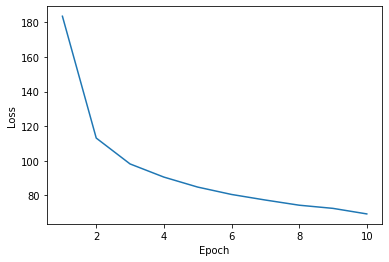

In [5]:
fig, ax = plt.subplots()
ax.plot(np.arange(NUM_EPOCHS) + 1, loss_history)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss');

In [6]:
acc = 0
for batch_imgs, batch_labels in test_iter:
    batch_imgs = batch_imgs.to(device)
    batch_labels = batch_labels.to(device)
    out = net(batch_imgs)
    out = out.argmax(axis=1)
    acc += (out == batch_labels).sum().item()
acc = acc / len(mnist_test)
print(acc)

0.855


SyntaxError: invalid syntax (temp/ipykernel_14428/2440581024.py, line 1)